## Introduction

Onderstraand vindt u een dataset gericht op de 'attrition' van werknemers. Met attrition wordt de slijtage van werknemers bedoeld. Hiermee wordt bedoeld dat het aantal werknemers afneemt en niet wordt vervangen. Er zijn veel vairabelen die hieraan bijdragen. Dit kan te maken hebben met slechte omstandigheden, geen groeimogelijkheden, ziekte en inkomen. 

Voor deze opdracht worden de volgende variabelen meegenomen om te voorspellen of iemand het bedrijf verlaat en dus 'yes' scoort op 'attrition':
- Age
- Gender
- JobSatisfaction
- MonthlyIncome
- EnvironmentSatisfaction
- TotalWorkingYears
- YearsSinceLastPromotion
- RelationshipSatisfaction

Bovenstaande variabelen worden meegenomen in het onderzoek aangezien wordt verwacht dat deze variabelen van grote invloed zijn op 'attrition'. 

## Importeren libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importeren van dataset

In [2]:
df1 = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Cleaning

#### Er wordt een subset gemaakt van de gekozen variabelen om vervolgens te kunnen gebruiken in het verdere onderzoek. De overige variabelen worden uitgesloten.

In [3]:
df1 = df1[['Attrition','Age','Gender','EnvironmentSatisfaction','JobSatisfaction','MonthlyIncome','RelationshipSatisfaction','TotalWorkingYears','YearsSinceLastPromotion']]
df1.head()

,Attrition,Age,Gender,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion
0,Yes,41,Female,2,4,5993,1,8,0
1,No,49,Male,3,2,5130,4,10,1
2,Yes,37,Male,4,3,2090,2,7,0
3,No,33,Female,4,3,2909,3,8,3
4,No,27,Male,1,2,3468,4,6,2


Er wordt gekeken naar de subset om NaN waardes en andere verschillen tussen de variabelen te ontdekken. Er blijken geen NaN waardes te zijn. Alle variabelen behalve 'gender' zijn integers. 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   EnvironmentSatisfaction   1470 non-null   int64 
 4   JobSatisfaction           1470 non-null   int64 
 5   MonthlyIncome             1470 non-null   int64 
 6   RelationshipSatisfaction  1470 non-null   int64 
 7   TotalWorkingYears         1470 non-null   int64 
 8   YearsSinceLastPromotion   1470 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 103.5+ KB


## Exploratory data analysis
Om relevante grafieken te kunnen laten zien, moeten de categorische variabelen eerst nummeriek worden. Daarom worden de kolommen 'gender' en 'attrition' onderstaand omgevormd van een object tot een integer. 

In [5]:
df1.Attrition.value_counts(), df1.Gender.value_counts()
df1_dummies = pd.get_dummies(df1,columns=['Gender','Attrition'],drop_first= True)
df1_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   EnvironmentSatisfaction   1470 non-null   int64
 2   JobSatisfaction           1470 non-null   int64
 3   MonthlyIncome             1470 non-null   int64
 4   RelationshipSatisfaction  1470 non-null   int64
 5   TotalWorkingYears         1470 non-null   int64
 6   YearsSinceLastPromotion   1470 non-null   int64
 7   Gender_Male               1470 non-null   uint8
 8   Attrition_Yes             1470 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 83.4 KB


Om te kijken hoe de dataset er nu uitziet, wordt er gebruik gemaakt van .head()

In [6]:
df1_dummies.head(15)

,Age,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,Gender_Male,Attrition_Yes
0,41,2,4,5993,1,8,0,0,1
1,49,3,2,5130,4,10,1,1,0
2,37,4,3,2090,2,7,0,1,1
3,33,4,3,2909,3,8,3,0,0
4,27,1,2,3468,4,6,2,1,0
5,32,4,4,3068,3,8,3,1,0
6,59,3,1,2670,1,12,0,0,0
7,30,4,3,2693,2,1,0,1,0
8,38,4,3,9526,2,10,1,1,0
9,36,3,3,5237,2,17,7,1,0


/Users/ReinoutBuwalda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


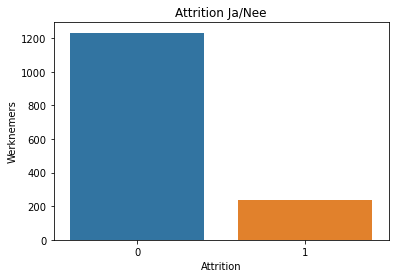

In [7]:
sns.countplot(df1_dummies['Attrition_Yes'])

# Add labels
plt.title('Attrition Ja/Nee')
plt.xlabel('Attrition')
plt.ylabel('Werknemers')
plt.show()

Er is gekozen om meer inzicht te bieden aan de hand van een tabel aangezien grafieken u niet tot meer inzicht zouden brengen. 

In [8]:
df1_dummies.corr()

,Age,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,Gender_Male,Attrition_Yes
Age,1.000000,0.010146,-0.004892,0.497855,0.053535,0.680381,0.216513,-0.036311,-0.159205
EnvironmentSatisfaction,0.010146,1.000000,-0.006784,-0.006259,0.007665,-0.002693,0.016194,0.000508,-0.103369
JobSatisfaction,-0.004892,-0.006784,1.000000,-0.007157,-0.012454,-0.020185,-0.018214,0.033252,-0.103481
MonthlyIncome,0.497855,-0.006259,-0.007157,1.000000,0.025873,0.772893,0.344978,-0.031858,-0.159840
RelationshipSatisfaction,0.053535,0.007665,-0.012454,0.025873,1.000000,0.024054,0.033493,0.022868,-0.045872
TotalWorkingYears,0.680381,-0.002693,-0.020185,0.772893,0.024054,1.000000,0.404858,-0.046881,-0.171063
YearsSinceLastPromotion,0.216513,0.016194,-0.018214,0.344978,0.033493,0.404858,1.000000,-0.026985,-0.033019
Gender_Male,-0.036311,0.000508,0.033252,-0.031858,0.022868,-0.046881,-0.026985,1.000000,0.029453
Attrition_Yes,-0.159205,-0.103369,-0.103481,-0.159840,-0.045872,-0.171063,-0.033019,0.029453,1.000000


Op basis van bovenstaande tabel valt te concluderen dat de gekozen variabelen niet veel invloed hebben op 'attrition'. Er valt wel te constateren dat leeftijd, inkomen, werkjaren en promotie met elkaar correleren, maar 'attrition' valt hier niet onder. 'Attrition' correleert het meeste met 'Gender_Male'. 

## Predictive model

Voor deze dataset wordt er gebruik gemaakt van kNN. Dit algoritmne geeft de mogelijkheid om datasets in groepen te verdelen op basis van de dichtstbij gelegen datapunten. Over het algemeen is een kNN niet het meest nauwkeurig, maar wel erg snel op met name kleine datasets. Doordat je goed kan visualiseren wat het model doet is het ook goed te begrijpen en daardoor makkelijk uit te leggen aan anderen. 

**Split the dataset into a training and test set**

In [9]:
from sklearn.preprocessing import normalize

X = df1_dummies.loc[:, ~df1_dummies.columns.isin(['Attrition_Yes'])] #create the X matrix
y = df1_dummies['Attrition_Yes'] #create the y-variable

X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,0.021542,0.000979,0.000979,0.999731,0.001469,0.008323,0.000490,0.000490
1,0.003875,0.000097,0.000388,0.999991,0.000388,0.001356,0.001066,0.000097
2,0.002570,0.000202,0.000101,0.999995,0.000050,0.001562,0.000554,0.000050
3,0.009994,0.001025,0.001025,0.999947,0.000513,0.001794,0.000513,0.000256
4,0.008230,0.000914,0.000686,0.999965,0.000686,0.000914,0.000229,0.000000


**Train the model**

In [10]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

**Model beoordelen**

In [11]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.8208616780045351

Het model heeft dus een accuraatheid van 82,1%

## Model evaluation: precision and recall

In [12]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[360,   4],
       [ 75,   2]])

In [13]:
conf_matrix = pd.DataFrame(cm, index=['Attrition (actual)', 'No Attrition (actual)'], columns = ['Attrition (predicted)', 'No Attrition (predicted)']) 
conf_matrix

,Attrition (predicted),No Attrition (predicted)
Attrition (actual),360,4
No Attrition (actual),75,2


**Accuracy**

In [14]:
(360+2)/(360+75+4+2)

0.8208616780045351

De accuracy komt overeen met de beoordeling van het model met behulp van knn.score

**Precision**

In [15]:
(360)/(360+75)

0.8275862068965517

Het model heeft dus in totaal maar 360 werknemers correct geïdentificeerd als 'attirtion' van de totaal 435 werknemers die zijn geïdentificeerd als 'attrition'. Het model toont dus een goede precisie. 

**Recall**
Bij de recall worden de correct voorspelde mensen met 'attrition'(True Positive) vergeleken met alle daadwerkelijke werknemers met 'attrition', dus (True Positive + False Negative). 

In [16]:
(360)/(360+4)

0.989010989010989

Hoe hoger de recall ligt, hoe minder verkeerde voorspellingen er zijn gedaan bij voor de dependent variable. In totaal zijn er namelij 360 juiste voorspellingen gedaan van de 364 mensen die daadwerkelijk onder 'attrition' vallen. 

## Conclusie

Al met al is het interessant om te zien dat je accuracy dus niet alles zegt over het model. Daarom bestaan de functies precision en recall. In dit model is de precision vooral belangrijk omdat dit laat zien hoe veel juiste voorspellingen er gedaan zijn op het gebied van 'attrition'. Het kan voor een bedrijf hoogstwaarschijnlijk verkeerd uitpakken als je iemand onterecht classificeert als 'attrition'. 

Toch is de recall ook belangrijk in dit model omdat het laat zien hoe veel van de werknemers die vallen onder 'attrtition' ook zo voorspeld zijn. Indien de recall en precision in een model allebei belangrijk zijn, wordt er gebruikg gemaakt van de F1-score. 

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       364
           1       0.33      0.03      0.05        77

    accuracy                           0.82       441
   macro avg       0.58      0.51      0.47       441
weighted avg       0.74      0.82      0.75       441



In het bovenstaande model is er echter niet gezocht naar de max test score en de K-waarde die daar mee gepaard gaat. Wel is de te zien dat de recall toeneemt als je de K-waarde verhoogt. Omdat er dan minder 'negatives' voorkomen daalt de noemer. 